## Lecture 2 - Centrality Measures

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

### 4. Eigenvector Centrality

#### Eigenvector Centrality - 1 

Eigenvector Centrality {0: 0.9999999999986358, 1: 9.536770448968605e-07, 2: 9.536770448968605e-07, 3: 9.536770448968605e-07}


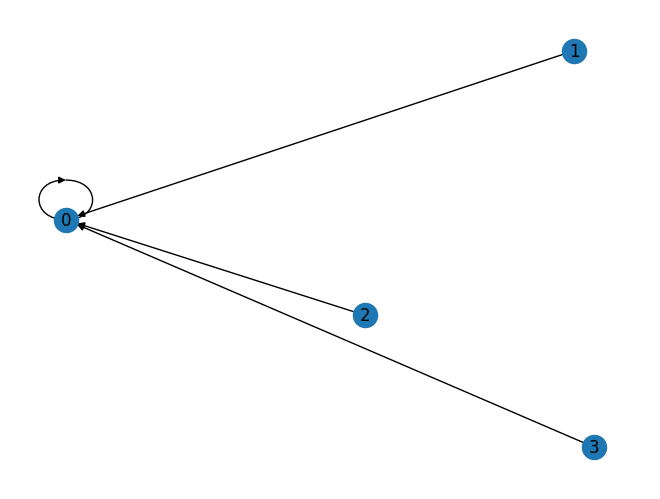

In [7]:
A = np.array([
	[1,0,0,0],
    [1,0,0,0],
    [1,0,0,0],
    [1,0,0,0]
])

# Create a graph
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Get the eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector Centrality", eigenvector_centrality)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

#### Eigenvector Centrality - II 

Eigenvector Centrality {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}


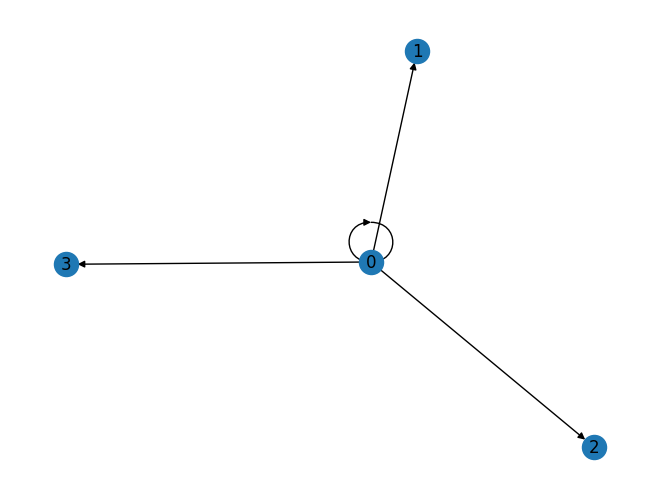

In [9]:
A = np.array([
	[1,1,1,1],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
])

# Create a graph
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Get the eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector Centrality", eigenvector_centrality)

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()

#### Eigenvector Centrality - III

Eigenvector Centrality {0: 0.7991714905460787, 1: 0.34704703269074766, 2: 0.34704703269074766, 3: 0.34704703269074766}


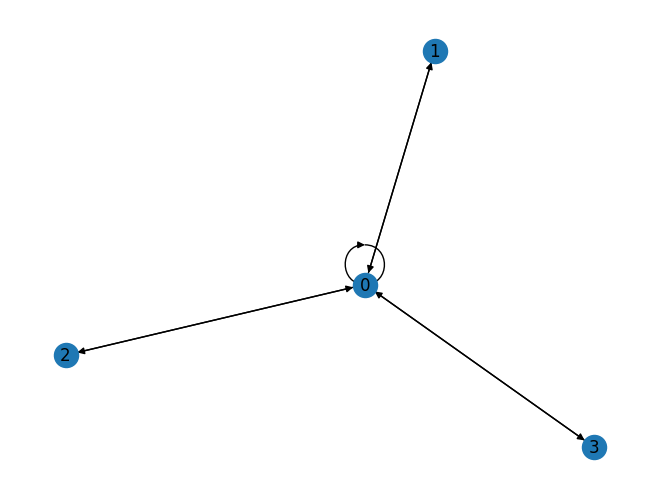

In [10]:
A = np.array([
    [1,1,1,1],
    [1,0,0,0],
    [1,0,0,0],
    [1,0,0,0]
])

# Create a graph
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Get the eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Eigenvector Centrality", eigenvector_centrality)

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()

----

### 5. Katz Centrality

#### Directed Acyclic Graphs

In [11]:
# Create a nilpotent matrix
# These are matrices that after being multiplied by itself eventually become all zeros
A = np.array([
    [1,1,1,1],
    [1,0,0,0],
    [1,0,0,0],
    [1,0,0,0]
])

# Get the determinant of the matrix
det = np.linalg.det(A)
print("Determinant", det)

Determinant 0.0


#### Katz Centrality

Katz Centrality [0.46473941 0.51121335 0.51121335 0.51121335]
Katz centrality values are normalized


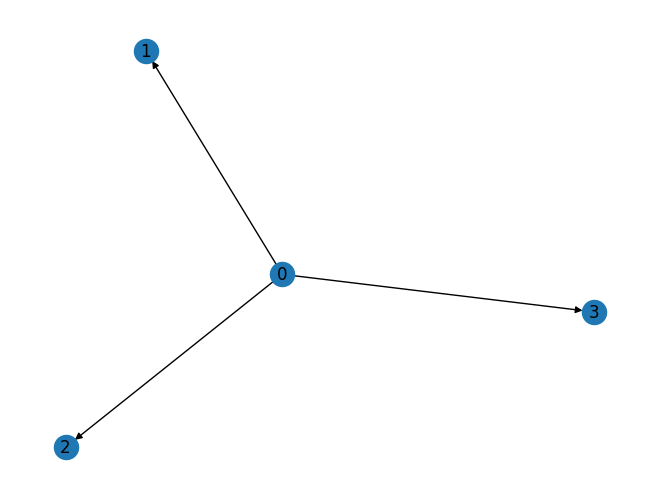

In [19]:
A = np.array([
    [0,1,1,1],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
])

# Create a graph
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Does it make sense talking about eigenvector centrality for this matrix?
# No, because the matrix is nilpotent

# Get the katz centrality
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1)

# Convert the katz centrality result array to a numpy array
katz_centrality = np.array(list(katz_centrality.values()))
print("Katz Centrality", katz_centrality)

# Check if the katz centrality values are normalized
if np.sqrt(np.sum(katz_centrality**2)) == 1:
    print("Katz centrality values are normalized")

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()

---

### 6. Page-Rank Centrality; Hubs and Authorities

#### Katz Centrality 

In [20]:
A = np.array([
	[0, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0]
])

# Create a graph
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Get the katz centrality
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1)

# Convert the katz centrality result array to a numpy array
katz_centrality = np.array(list(katz_centrality.values()))
print("Katz Centrality", katz_centrality)

# Check if the katz centrality values are normalized
if np.sqrt(np.sum(katz_centrality**2)) == 1:
    print("Katz centrality values are normalized")

Katz Centrality [0.49029248 0.362204   0.362204   0.362204   0.362204   0.35858196
 0.32598361]
Katz centrality values are normalized


#### Page-Rank Centrality

In [21]:
# Compute the page rank centrality of the nodes using networkx.pagerank
pagerank_centrality = nx.pagerank(G, alpha=0.85)

# Convert the pagerank centrality result array to a numpy array
pagerank_centrality = np.array(list(pagerank_centrality.values()))
print("PageRank Centrality", pagerank_centrality)

PageRank Centrality [0.34304517 0.12178517 0.12178517 0.12178517 0.12178517 0.09978782
 0.07002631]


#### Hubs and Authorities

In [22]:
A = np.array([
    [0, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0]
])

# Create a graph
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Get the HITS centrality for hubs and authorities
hubs, authorities = nx.hits(G, max_iter=100, normalized=True)

# Convert the hubs and authorities result arrays to numpy arrays
hubs = np.array(list(hubs.values()))
authorities = np.array(list(authorities.values()))
print("Hubs", hubs)
print("Authorities", authorities)


Hubs [0.25440104 0.13175928 0.13175928 0.13175928 0.13175928 0.08680254
 0.13175928]
Authorities [0.25440104 0.13175928 0.13175928 0.13175928 0.13175928 0.13175928
 0.08680254]


#### Closeness Centrality in a Circle Graph

Closeness Centrality {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5}
Closeness Centrality Estimate 0.5


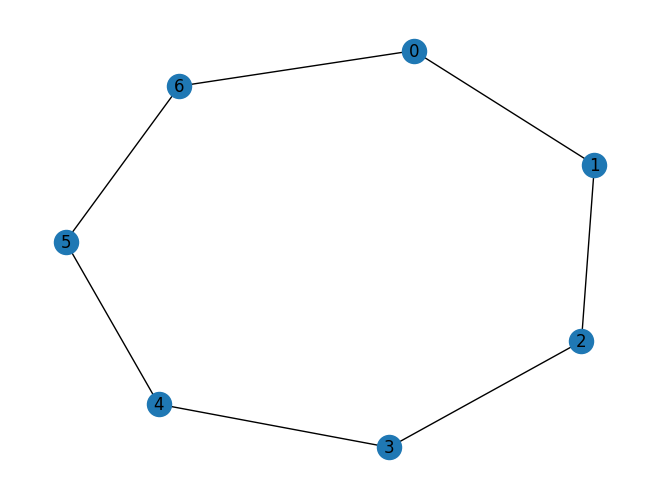

In [43]:
# Number of nodes
n = 7

# Create a circle graph
G = nx.cycle_graph(n)

# Compute the closeness centrality 
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality", closeness_centrality)

# Sum of shortest distances between nodes (sum(d_ij))
# 3: 2*1
# 5: 2*3
# 7: 2*6 
# 9: 2*10
# 1. This is equivalent to a*(a+1) if a = 1, 2, 3, 4
# 2. We need a way to map n (3, 5, 7, 9) to a(1, 2, 3, 4): (n-1)/2 = a
# 3. Now we replace a with (n-1)/2 in the formula: (n-1)/2 * ((n-1)/2 + 1)
# 4. Simplify: (n-1)/2 * (n+1)/2 
# 5. The above simplification is equal to sum(d_ij) so now we apply the 1/(n-1) 
#    of the closeness centrality formula
# 6. 1/(n-1) * ((n-1)/2 * (n+1)/2) = (n+1)/4
# 7. We apply the reciprocal of the formula to get the closeness centrality: 4/(n+1)
print("Closeness Centrality Estimate", 4/(n+1))

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()

#### Betweenness Centrality in a Line Graph

Betweenness Centrality {0: 0.0, 1: 0.3333333333333333, 2: 0.5333333333333333, 3: 0.6, 4: 0.5333333333333333, 5: 0.3333333333333333, 6: 0.0}


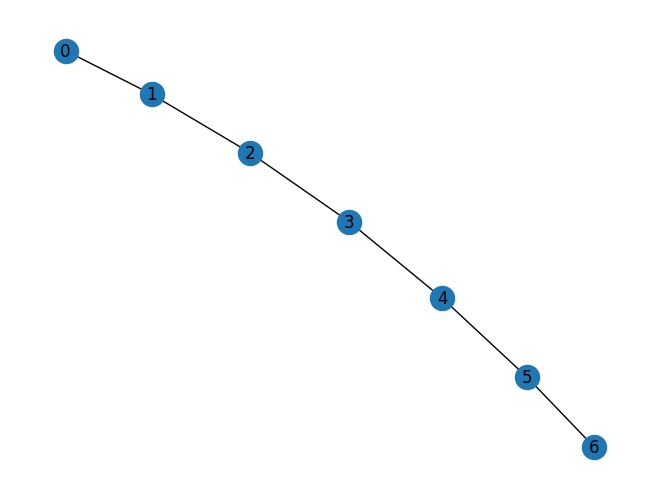

In [46]:
# Number of nodes
n = 7

# Generate a straight line graph
G = nx.path_graph(n)

# Compute the betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality", betweenness_centrality)

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()